<h1>PIPELINING WITH POTUS DATA AND MACHINE LEARNING</h1>

<h2>IMPORT SOME LIBRARIES AND READ IN DATA</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
##check out tutorial here:
##http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb
df = pd.read_csv('../train.csv')
df1 = df.drop('Winner', 1)
df['Win_bin'] = (df['Winner'] == 'Barack Obama') ##new column: logical wrt winner
df.head()

,Total population,Median age,% BachelorsDeg or higher,Unemployment rate,Per capita income,Total households,Average household size,% Owner occupied housing,% Renter occupied housing,% Vacant housing,Median home value,Population growth,House hold growth,Per capita income growth,Winner,Win_bin
0,9278,37.9,12.6,21.3,13992,3802,2.42,51.9,16.6,31.6,63959,-0.69,-0.49,0.71,Barack Obama,True
1,18594,36.3,9.7,14.3,14622,6764,2.55,63.7,16.2,20.1,74330,-0.13,0.03,0.85,Barack Obama,True
2,662628,37.9,27.9,12.1,23909,267862,2.41,57.0,28.8,14.2,112687,-0.09,0.00,0.55,Barack Obama,True
3,21292,38.9,14.1,15.7,16829,8547,2.47,63.5,17.1,19.4,73643,-0.59,-0.43,0.57,Barack Obama,True
4,13252,34.5,15.0,15.8,13012,5222,2.47,53.7,20.7,25.6,56642,-1.16,-1.03,0.69,Barack Obama,True


<h2>SPLIT DATA INTO TRAINING AND TEST SETS</h2>

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, df['Winner'], test_size = 0.1, 
                                                    random_state=0)
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (1091, 14)
y_train shape: (1091,)
X_test shape: (122, 14)
y_test shape: (122,)


<h2>OPENING THE PIPELINE</h2>

In [3]:
#see here for intuition:
#http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
from sklearn import linear_model, decomposition, datasets, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC
#build a scaler component to pipeline:
scaler = preprocessing.StandardScaler().fit(X_train)
#see here for 'scaler in pipeline' details: 
#http://scikit-learn.org/stable/modules/preprocessing.html
#X_train_scaled = scaler.transform(X_train)
#Instantiate a model:
logistic = linear_model.LogisticRegression()
#this is the pipe!:
svm = LinearSVC() # Instantiate the model
tuned_parameters = 10.**np.arange(-3,5)
pipe = Pipeline(steps=[('scale', scaler), ('svm', svm)])

In [4]:
estimator = GridSearchCV(pipe,
                         dict(
                              svm__C=tuned_parameters))
estimator.fit(X_train , y_train);
print(estimator.best_estimator_)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0))])


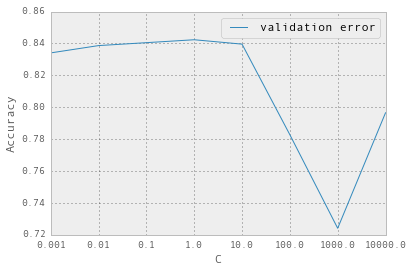

In [13]:
plt.plot([c.mean_validation_score for c in estimator.grid_scores_], label="validation error")
plt.xticks(np.arange(len(tuned_parameters)), tuned_parameters); plt.xlabel("C"); plt.ylabel("Accuracy");plt.legend(loc='best');

mean: 0.83410, std: 0.00447, params: {'svm__C': 0.001}
mean: 0.83868, std: 0.00546, params: {'svm__C': 0.01}
mean: 0.84051, std: 0.00431, params: {'svm__C': 0.10000000000000001}
mean: 0.84235, std: 0.00448, params: {'svm__C': 1.0}
mean: 0.83960, std: 0.00714, params: {'svm__C': 10.0}
mean: 0.78277, std: 0.04901, params: {'svm__C': 100.0}
mean: 0.72411, std: 0.04093, params: {'svm__C': 1000.0}
mean: 0.79652, std: 0.02038, params: {'svm__C': 10000.0}


<h2>MAKE PREDICTIONS ON TEST SET</h2>

In [45]:
predictions = estimator.best_estimator_.predict(X_test)
#linear SVM that performed the best above
#print(predictions)
#how accurate was this?
#do this tomorrow
acc = float(sum(np.equal(predictions , y_test)))/len(predictions)
print('accuracy of best SVM = %s' % acc)

accuracy of best SVM = 0.901639344262
